In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_csv = pd.read_excel("/content/results-2021-cefas-website (3).xlsx", 
                         sheet_name=1, skiprows=1, usecols= "H:K")

# to remove initial noise from the dataset
file_csv = file_csv.head(882)
#test
file_csv.tail()




,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
877,ND,ND,ND,ND
878,ND,ND,ND,80
879,ND,ND,ND,ND
880,ND,ND,ND,ND
881,ND,ND,ND,400


In [3]:
# CLEAN DATA AND REPLACE VALUES

file_csv.replace({"ND": 0, "Unable to analyse, too much sediment": -1,
                  "NOT TESTED, SUBMITTED IN ERROR":-1}, inplace=True)
file_csv.iloc[:, [0,1,2,3]] = file_csv.iloc[:, [0,1,2,3]].fillna(-1)


file_csv.tail()

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
877,0,0.0,0.0,0.0
878,0,0.0,0.0,80.0
879,0,0.0,0.0,0.0
880,0,0.0,0.0,0.0
881,0,0.0,0.0,400.0


In [4]:
# CHANGE STRINGS TO NUMBERS
file_csv.iloc[:, 0] = pd.to_numeric(file_csv.iloc[:, 0], errors='raise', downcast=None)
file_csv.iloc[:, 1] = pd.to_numeric(file_csv.iloc[:, 1], errors='raise', downcast=None)
file_csv.iloc[:, 2] = pd.to_numeric(file_csv.iloc[:, 2], errors='raise', downcast=None)
file_csv.iloc[:, 3] = pd.to_numeric(file_csv.iloc[:, 3], errors='raise', downcast=None)

In [5]:
#CHECK FOR NULL VALUES
file_csv.isnull().any()

Alexandrium spp. \ncells L-1\n(PSP)          False
Dinophysiaceae \ncells L-1\n(DSP)            False
Prorocentrum lima \ncells L-1\n(DSP)         False
Pseudo-nitzschia spp. \ncells L-1\n(ASP)     False
dtype: bool

In [6]:
#ADD NEW COLUMN BASED ON THRESHOLD
threshold_dict = {"PSP" : 40, "DSP" : 100, "ASP" : 150000}

file_csv["result"] = np.zeros(len(file_csv.iloc[:,0]))


file_csv["result"] = np.where(file_csv.iloc[:,0] > threshold_dict["PSP"], 1,file_csv["result"])
file_csv["result"] = np.where(file_csv.iloc[:,1] > threshold_dict["DSP"], 1,file_csv["result"])
file_csv["result"] = np.where(file_csv.iloc[:,2] > threshold_dict["DSP"], 1,file_csv["result"])
file_csv["result"] = np.where(file_csv.iloc[:,3] > threshold_dict["ASP"], 1,file_csv["result"])



In [8]:
# CHECK FOR NUMBER OF 1S AND NUMBER OS (NUMBER OF VALUES IN EACH CLASS)
class_1 = 0
for i in list(file_csv["result"]):
  if i == 1.0:
    class_1+=1

class_2 = len(file_csv["result"])-class_1
print("class_1 is:",class_1,"class_2 is:",class_2)

class_1 is: 79 class_2 is: 803


In [9]:
#separate data

x = file_csv.iloc[:,[0,1,2,3]]
y = file_csv.iloc[:,[-1]]

x.head()
y.head()

,result
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [10]:
import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [11]:
#NORMALISING DATA
X = preprocessing.scale(x)
print(X)
print(X.shape)



[[-0.15819199 -0.18314393 -0.056005   -0.16995354]
 [-0.15819199 -0.18314393 -0.056005   -0.16995354]
 [-0.15819199 -0.18314393 -0.056005   -0.15889565]
 ...
 [-0.15819199 -0.18314393 -0.056005   -0.16995354]
 [-0.15819199 -0.18314393 -0.056005   -0.16995354]
 [-0.15819199 -0.18314393 -0.056005   -0.15889565]]
(882, 4)


In [15]:
#SPLIT DATA INTO TEST AND TRAIN

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)



In [41]:
#baseline
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_model.predict(X)

print("the baseline established is:", "{:.2f}".format(dummy_model.score(X, y)*100)+"%")



the baseline established is: 91.04%


In [ ]:
"""
model.add(Dense(activation="tanh", input_dim=4, units=250,
                kernel_initializer="uniform"))

#adding second hidden layer
model.add(Dense(activation="tanh", units=15, kernel_initializer="uniform"))
#Dropout(0.25)

#adding third hidden layer
model.add(Dense(activation="tanh", units=10, kernel_initializer="uniform"))

model.add(Dense(activation="tanh", units=10, kernel_initializer="uniform"))

model.add(Dense(activation="tanh", units=8, kernel_initializer="uniform"))

model.add(Dense(activation="tanh", units=4, kernel_initializer="uniform"))
#Dropout(0.2)

#adding the output layer
model.add(Dense(1, activation='tanh'))
 
model.summary()

model.compile(loss='binary_crossentropy',
optimizer='SGD',
metrics=['accuracy'])

history = model.fit(X_train, y_train,batch_size=10,epochs=10,verbose=1,
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[-1])"""

'\nmodel.add(Dense(activation="tanh", input_dim=4, units=250,\n                kernel_initializer="uniform"))\n\n#adding second hidden layer\nmodel.add(Dense(activation="tanh", units=15, kernel_initializer="uniform"))\n#Dropout(0.25)\n\n#adding third hidden layer\nmodel.add(Dense(activation="tanh", units=10, kernel_initializer="uniform"))\n\nmodel.add(Dense(activation="tanh", units=10, kernel_initializer="uniform"))\n\nmodel.add(Dense(activation="tanh", units=8, kernel_initializer="uniform"))\n\nmodel.add(Dense(activation="tanh", units=4, kernel_initializer="uniform"))\n#Dropout(0.2)\n\n#adding the output layer\nmodel.add(Dense(1, activation=\'tanh\'))\n \nmodel.summary()\n\nmodel.compile(loss=\'binary_crossentropy\',\noptimizer=\'SGD\',\nmetrics=[\'accuracy\'])\n\nhistory = model.fit(X_train, y_train,batch_size=10,epochs=10,verbose=1,\n                    validation_data=(X_test, y_test))\n\nscore = model.evaluate(X_test, y_test, verbose=0)\n\nprint(\'Test loss:\', score[0])\nprint(\'

In [16]:
#FINAL ARCHITECTURE USED
model = Sequential()

model.add(Dense(activation="sigmoid", input_dim=4, units=100,
                kernel_initializer="uniform"))

#adding second hidden layer
model.add(Dense(activation="sigmoid", units=15, kernel_initializer="uniform"))
Dropout(0.25)

#adding third layer
model.add(Dense(activation="tanh", units=8, kernel_initializer="uniform"))

#adding fourth layer
model.add(Dense(activation="tanh", units=4, kernel_initializer="uniform"))
Dropout(0.2)

#adding the output layer
model.add(Dense(1, activation='relu'))
 
model.summary()

model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               500       
                                                                 
 dense_11 (Dense)            (None, 15)                1515      
                                                                 
 dense_12 (Dense)            (None, 8)                 128       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,184
Trainable params: 2,184
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Fitting the model on the dataset
history = model.fit(X_train, y_train,batch_size=10,epochs=10,verbose=1,
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[-1])

Epoch 1/10
62/62 [==============================] - 1s 7ms/step - loss: 0.3143 - accuracy: 0.9109 - val_loss: 0.3034 - val_accuracy: 0.9094
Epoch 2/10
62/62 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.9109 - val_loss: 0.3032 - val_accuracy: 0.9094
Epoch 3/10
62/62 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.9109 - val_loss: 0.3027 - val_accuracy: 0.9094
Epoch 4/10
62/62 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9109 - val_loss: 0.2992 - val_accuracy: 0.9094
Epoch 5/10
62/62 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.9109 - val_loss: 0.2930 - val_accuracy: 0.9094
Epoch 6/10
62/62 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9109 - val_loss: 0.2743 - val_accuracy: 0.9094
Epoch 7/10
62/62 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9109 - val_loss: 0.2390 - val_accuracy: 0.9094
Epoch 8/10
62/62 [==

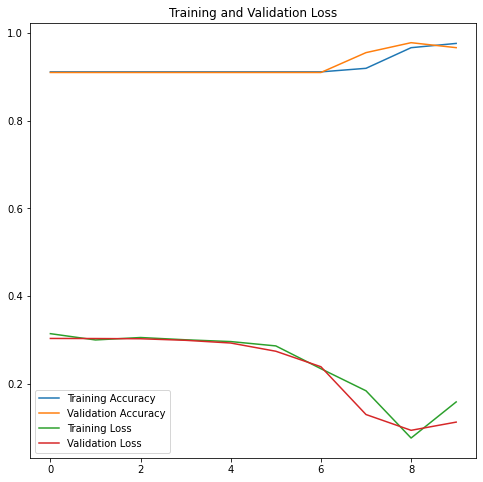

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.jpg", dpi=100)
plt.show()

In [20]:
#class distribution before resampling
zero = 0 
one  = 0
for i in file_csv["result"]:
  if i == 0:
    zero +=1
  else:
    one +=1

print(zero)
print(one)


803
79


In [21]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn


In [22]:
#RESAMPLING
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X, y)



Resampled dataset shape Counter({'result': 1})


In [23]:
#showing new dataset class redistribution
zero_ = 0 
one_  = 0
for i in np.array(y_train_res):
  if i == 0:
    zero_ +=1
  else:
    one_ +=1

print(zero_)
print(one_)


803
803


In [24]:
y_train_res = np.array(y_train_res)
y_train_res

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [29]:
#TESTING CLASSIFIER AFTER RESAMPLING
clf = Sequential()
clf.add(Dense(activation="sigmoid", input_dim=4, units=100, kernel_initializer="uniform"))

#adding second hidden layer
clf.add(Dense(activation="sigmoid", units=15, kernel_initializer="uniform"))
Dropout(0.25)

#adding third hidden layer
#model.add(Dense(activation="tanh", units=10, kernel_initializer="uniform"))



clf.add(Dense(activation="tanh", units=8, kernel_initializer="uniform"))

clf.add(Dense(activation="tanh", units=4, kernel_initializer="uniform"))
Dropout(0.2)

#adding the output layer
clf.add(Dense(1, activation='relu'))
 
clf.summary()

clf.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               500       
                                                                 
 dense_21 (Dense)            (None, 15)                1515      
                                                                 
 dense_22 (Dense)            (None, 8)                 128       
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,184
Trainable params: 2,184
Non-trainable params: 0
_________________________________________________________________


In [44]:
#testing to see the format of my y_test array
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
history_ = clf.fit(X_train_res, y_train_res,batch_size=10,epochs=10,verbose=1,
                    validation_data=(X_test, y_test))

score_ = clf.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score_[0])
print('Test accuracy:', score_[-1])

Epoch 1/10
161/161 [==============================] - 1s 3ms/step - loss: 0.8149 - accuracy: 0.5299 - val_loss: 0.7286 - val_accuracy: 0.0906
Epoch 2/10
161/161 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6594 - val_loss: 0.6688 - val_accuracy: 0.9623
Epoch 3/10
161/161 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.8973 - val_loss: 0.5805 - val_accuracy: 0.9509
Epoch 4/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.9651 - val_loss: 0.0639 - val_accuracy: 0.9887
Epoch 5/10
161/161 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9776 - val_loss: 0.3713 - val_accuracy: 0.9170
Epoch 6/10
161/161 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9726 - val_loss: 0.0809 - val_accuracy: 0.9962
Epoch 7/10
161/161 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9770 - val_loss: 0.0572 - val_accuracy: 0.9925
Epoch 

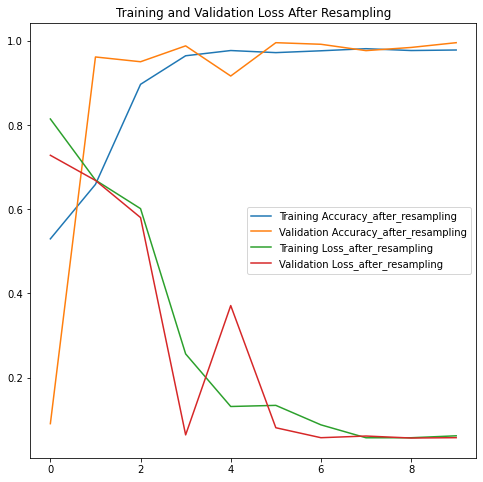

In [33]:
acc_ = history_.history['accuracy']
val_acc_ = history_.history['val_accuracy']
loss_ = history_.history['loss']
val_loss_ = history_.history['val_loss']
epochs_range_ = range(len(acc_))
plt.figure(figsize=(8, 8))
plt.plot(epochs_range_, acc_, label='Training Accuracy_after_resampling')
plt.plot(epochs_range_, val_acc_, label='Validation Accuracy_after_resampling')
plt.plot(epochs_range_, loss_, label='Training Loss_after_resampling')
plt.plot(epochs_range_, val_loss_, label='Validation Loss_after_resampling')
plt.legend(loc='best')
plt.title('Training and Validation Loss After Resampling')
plt.savefig("water_quality_nn_after_resampling.jpg", dpi=100)
plt.show()

                                           Alexandrium spp. \ncells L-1\n(PSP)  ...    result
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000  ...  0.456362
Dinophysiaceae \ncells L-1\n(DSP)                                     0.056926  ...  0.508894
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008805  ...  0.175675
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.020597  ...  0.276776
result                                                                0.456362  ...  1.000000

[5 rows x 5 columns]


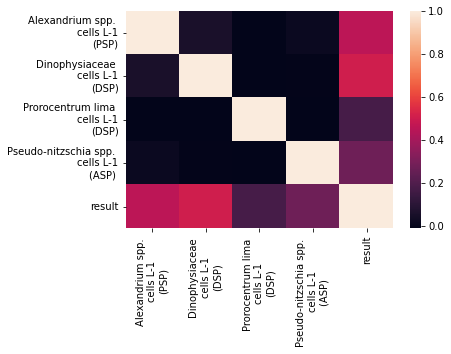

In [34]:
#DATA VISUALISATION TO SHOW CORRELATION MATRIX
import seaborn as sns

correlation_matrix = file_csv.corr()

print (correlation_matrix)
ax = sns.heatmap(correlation_matrix)
plt.savefig("Correlation_after_analysis.jpg", dpi=100)

In [45]:
#Checking correlation with other features involved in the original dataset
test_csv = pd.read_excel("/content/results-2021-cefas-website (3).xlsx", 
                         sheet_name=1, skiprows=1, usecols= "A:N")

# to remove initial noise from the dataset
test_csv = test_csv.head(882)
test_csv.tail()


,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
877,910/21,Lune,BO66Z,Wyre BC,SD34194862,Knott Spit,2021-11-16 09:40:00,ND,ND,ND,ND,ND,ND,ND
878,911/21,Porthallow Cove,B34AA,Cornwall PHA,SW80212383,Porthallow North,2021-11-17 09:50:00,ND,ND,ND,80,ND,ND,ND
879,912/21,Langstone Harbour,B019I,Portsmouth PHA,SU70560339,Stoke Common Lake,2021-11-16 14:30:00,ND,ND,ND,ND,ND,ND,ND
880,913/21,Portsmouth Harbour,B020H,Portsmouth PHA,SU62850544,Paulsgrove,2021-11-17 10:30:00,ND,ND,ND,ND,ND,ND,ND
881,914/21,Anglesey - Red Wharf Bay,B057J,Ynys Mon CC,SH53148022,Nodwydd,2021-11-17 09:45:00,ND,ND,ND,400,ND,ND,ND


                                                    Alexandrium spp. \ncells L-1\n(PSP)  ...    result
Alexandrium spp. \ncells L-1\n(PSP)                                            1.000000  ...  0.456362
Dinophysiaceae \ncells L-1\n(DSP)                                              0.056889  ...  0.508866
Prorocentrum lima \ncells L-1\n(DSP)                                          -0.008817  ...  0.175665
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                                       0.020562  ...  0.276735
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)                              -0.007077  ... -0.014081
Protoceratium reticulatum \ncells L-1\n(Yessoto...                            -0.007050  ... -0.014256
Prorocentrum cordatum \ncells L-1\n(Venerupin)                                -0.006168  ... -0.012127
result                                                                         0.456362  ...  1.000000

[8 rows x 8 columns]


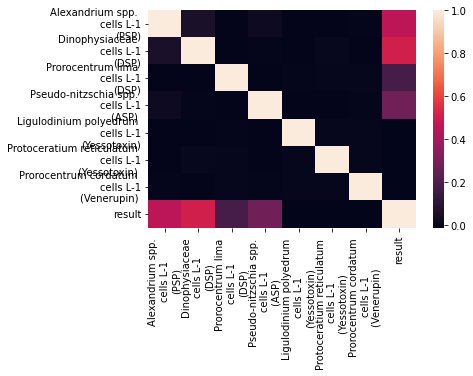

In [42]:
test_csv.replace({"ND": 0, "Unable to analyse, too much sediment": -1,
                  "NOT TESTED, SUBMITTED IN ERROR":-1}, inplace=True)

test_csv["result"]= file_csv["result"]



correlation = test_csv.corr()

print (correlation)
ax = sns.heatmap(correlation)
plt.savefig("Correlation_before_analysis.jpg", dpi=100)